In [7]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.cluster import KMeans
from sklearn.metrics import classification_report, confusion_matrix

# Load the dataset
file_path = 'laliga_player_stats_english.csv'
data = pd.read_csv(file_path)

# Display basic info
data.head()
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 556 entries, 0 to 555
Data columns (total 62 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   Team                                   556 non-null    object 
 1   Position                               556 non-null    object 
 2   Shirt number                           526 non-null    float64
 3   Name                                   556 non-null    object 
 4   Minutes played                         556 non-null    float64
 5   Games played                           556 non-null    int64  
 6   Percentage of games played             556 non-null    object 
 7   Full games played                      556 non-null    int64  
 8   Percentage of full games played        556 non-null    object 
 9   Games started                          556 non-null    int64  
 10  Percentage of games started            556 non-null    object 
 11  Games 

In [8]:
# Handle missing values
data.fillna(value={'Shirt number': data['Shirt number'].mode()[0]}, inplace=True)

# Drop unnecessary columns for simplicity
columns_to_drop = ['Percentage of games played', 'Percentage of full games played', 'Percentage of games started']
data.drop(columns=columns_to_drop, inplace=True)

# Encode categorical variables
le_team = LabelEncoder()
data['Team'] = le_team.fit_transform(data['Team'])

le_position = LabelEncoder()
data['Position'] = le_position.fit_transform(data['Position'])

# Display the cleaned dataset
data.head()


,Team,Position,Shirt number,Name,Minutes played,Games played,Full games played,Games started,Games where substituted,Percentage of games where substituted,...,Corners,Tackles.1,Duels,Man-to-man duels,Aerial duels,Passes,Short passes,Long passes,Through balls,Goals scored per attempt
0,0,2,1.0,Hodei Oleaga,0.000,0,0,0,0,0.00%,...,0,0,0,0,0,0.0,0.0,0,0,0
1,0,2,1.0,A. Remiro,0.000,0,0,0,0,0.00%,...,0,0,0,0,0,0.0,0.0,0,0,0
2,0,2,13.0,Herrerín,2.790,31,31,31,0,0.00%,...,0,0,25,6,19,887.0,128.0,759,1,0
3,0,2,25.0,Unai Simón,630.000,7,7,7,0,0.00%,...,0,0,3,2,1,155.0,49.0,106,0,0
4,0,0,3.0,Núñez,1.063,12,11,11,1,3.00%,...,0,15,107,38,69,536.0,457.0,78,1,0


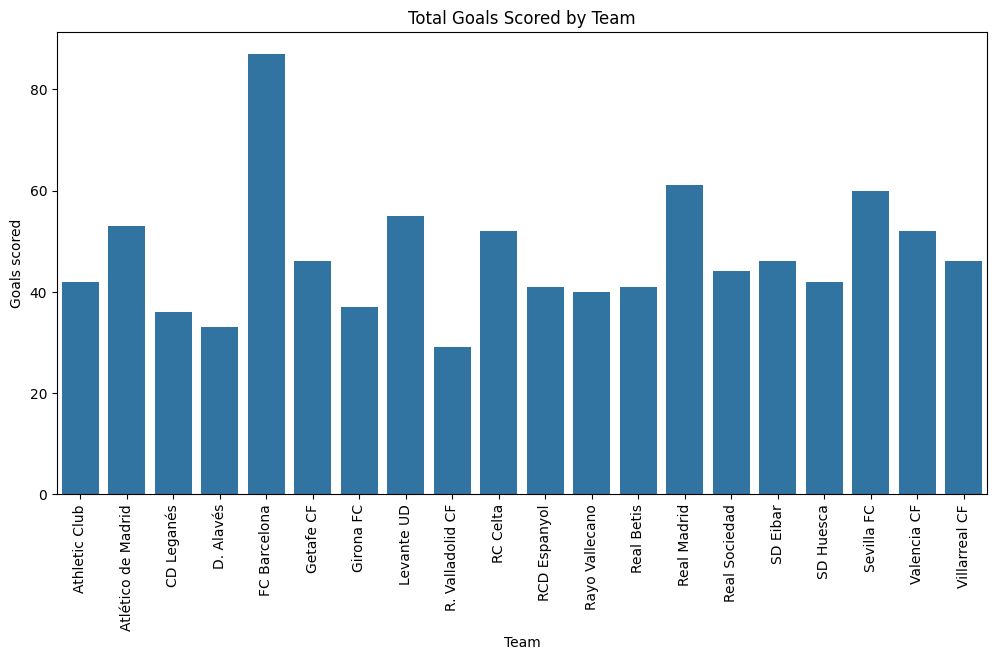

In [9]:
# Group by teams and calculate statistics
team_analysis = data.groupby('Team').agg({
    'Minutes played': 'mean',
    'Goals scored': 'sum',
    'Assists': 'sum'
}).reset_index()

# Decode team names
team_analysis['Team'] = le_team.inverse_transform(team_analysis['Team'])

# Visualize team data
plt.figure(figsize=(12, 6))
sns.barplot(data=team_analysis, x='Team', y='Goals scored')
plt.title('Total Goals Scored by Team')
plt.xticks(rotation=90)
plt.show()


In [10]:
# Feature selection and target definition
X = data[['Minutes played', 'Shots', 'Assists', 'Goals scored']]
y = data['Position']

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Scale the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# kNN Classifier
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)
knn_pred = knn.predict(X_test)

# Naive Bayes Classifier
nb = GaussianNB()
nb.fit(X_train, y_train)
nb_pred = nb.predict(X_test)

# Evaluate classifiers
print("kNN Classification Report")
print(classification_report(y_test, knn_pred))
print("Naive Bayes Classification Report")
print(classification_report(y_test, nb_pred))


kNN Classification Report
              precision    recall  f1-score   support

           0       0.45      0.65      0.54        52
           1       0.65      0.55      0.60        31
           2       0.50      0.21      0.30        19
           3       0.43      0.38      0.41        65

    accuracy                           0.48       167
   macro avg       0.51      0.45      0.46       167
weighted avg       0.49      0.48      0.47       167

Naive Bayes Classification Report
              precision    recall  f1-score   support

           0       0.54      0.77      0.63        52
           1       0.60      0.39      0.47        31
           2       0.42      0.95      0.58        19
           3       0.53      0.25      0.34        65

    accuracy                           0.51       167
   macro avg       0.52      0.59      0.51       167
weighted avg       0.53      0.51      0.48       167



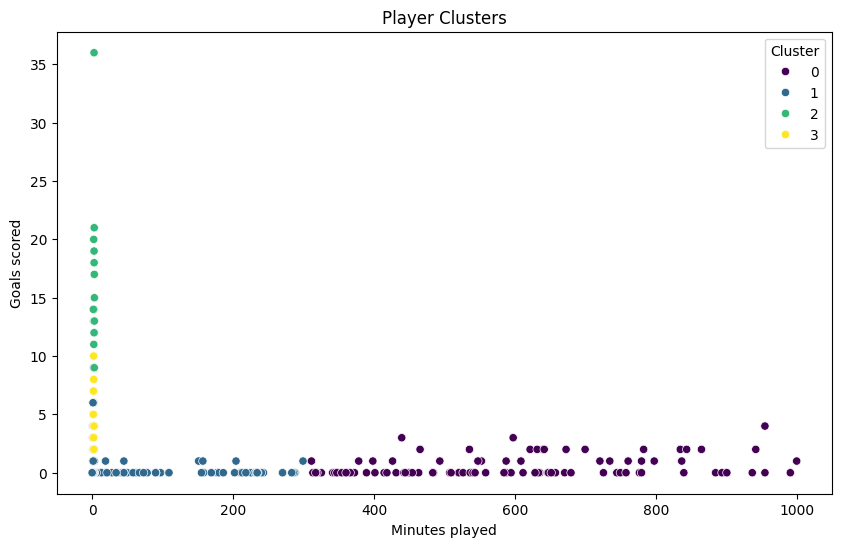

In [11]:
# Select features for clustering
X_cluster = data[['Minutes played', 'Goals scored', 'Assists']]

# Scale features
X_cluster_scaled = scaler.fit_transform(X_cluster)

# k-Means Clustering
kmeans = KMeans(n_clusters=4, random_state=42)
clusters = kmeans.fit_predict(X_cluster_scaled)

# Add cluster labels to the dataset
data['Cluster'] = clusters

# Visualize clusters
plt.figure(figsize=(10, 6))
sns.scatterplot(data=data, x='Minutes played', y='Goals scored', hue='Cluster', palette='viridis')
plt.title('Player Clusters')
plt.show()


In [12]:
# Save cleaned data
data.to_csv('cleaned_laliga_data.csv', index=False)

# Save analysis results
team_analysis.to_csv('team_analysis.csv', index=False)


In [14]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import classification_report, confusion_matrix

# Load the dataset
file_path = 'laliga_player_stats_english.csv'  # Update with your correct file path
data = pd.read_csv(file_path)

# Display basic info
print(data.head())
print(data.info())


            Team    Position  Shirt number          Name  Minutes played  \
0  Athletic Club  Goalkeeper           NaN  Hodei Oleaga           0.000   
1  Athletic Club  Goalkeeper           1.0     A. Remiro           0.000   
2  Athletic Club  Goalkeeper          13.0      Herrerín           2.790   
3  Athletic Club  Goalkeeper          25.0    Unai Simón         630.000   
4  Athletic Club    Defender           3.0         Núñez           1.063   

   Games played Percentage of games played  Full games played  \
0             0                      0.00%                  0   
1             0                      0.00%                  0   
2            31                     82.00%                 31   
3             7                     18.00%                  7   
4            12                     32.00%                 11   

  Percentage of full games played  Games started  ... Corners  Tackles.1  \
0                           0.00%              0  ...       0          0   


In [15]:
# Handle missing values
data.fillna(0, inplace=True)  # Replace missing values with 0 for simplicity

# Select relevant features for classification
features = ['Minutes played', 'Goals scored', 'Assists', 'Shots on target']
target = 'Team'

# Encode the 'Team' column (categorical target)
le = LabelEncoder()
data['Team_encoded'] = le.fit_transform(data['Team'])

# Define features and target
X = data[features]
y = data['Team_encoded']

# Display the processed data
print("Features:")
print(X.head())
print("Target:")
print(data[['Team', 'Team_encoded']].drop_duplicates())


Features:
   Minutes played  Goals scored  Assists  Shots on target
0           0.000             0        0                0
1           0.000             0        0                0
2           2.790             0        1                0
3         630.000             0        0                0
4           1.063             0        0                3
Target:
                   Team  Team_encoded
0         Athletic Club             0
29   Atlético de Madrid             1
61           CD Leganés             2
90            D. Alavés             3
116        FC Barcelona             4
142           Getafe CF             5
166           Girona FC             6
195          Levante UD             7
221    R. Valladolid CF             8
251      Rayo Vallecano            11
284            RC Celta             9
309        RCD Espanyol            10
337          Real Betis            12
367         Real Madrid            13
398       Real Sociedad            14
431            SD Eibar   

In [16]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Standardize the features for KNN
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


Gaussian Naive Bayes Classification Report:
                    precision    recall  f1-score   support

     Athletic Club       0.00      0.00      0.00        10
Atlético de Madrid       0.12      0.29      0.17         7
        CD Leganés       0.00      0.00      0.00        18
         D. Alavés       0.00      0.00      0.00         5
      FC Barcelona       0.11      0.14      0.12         7
         Getafe CF       0.00      0.00      0.00         9
         Girona FC       0.00      0.00      0.00         9
        Levante UD       0.00      0.00      0.00         8
  R. Valladolid CF       0.00      0.00      0.00        12
          RC Celta       0.00      0.00      0.00         4
      RCD Espanyol       0.00      0.00      0.00         6
    Rayo Vallecano       0.25      0.12      0.17         8
        Real Betis       0.00      0.00      0.00         7
       Real Madrid       0.00      0.00      0.00        10
     Real Sociedad       0.06      0.60      0.11      

/Users/billbao/Dropbox/Mac/Documents/2024 Fall/322/finalProject/CPSC322-FinalProject/.venv/lib/python3.13/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/billbao/Dropbox/Mac/Documents/2024 Fall/322/finalProject/CPSC322-FinalProject/.venv/lib/python3.13/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/billbao/Dropbox/Mac/Documents/2024 Fall/322/finalProject/CPSC322-FinalProject/.venv/lib/python3.13/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defi

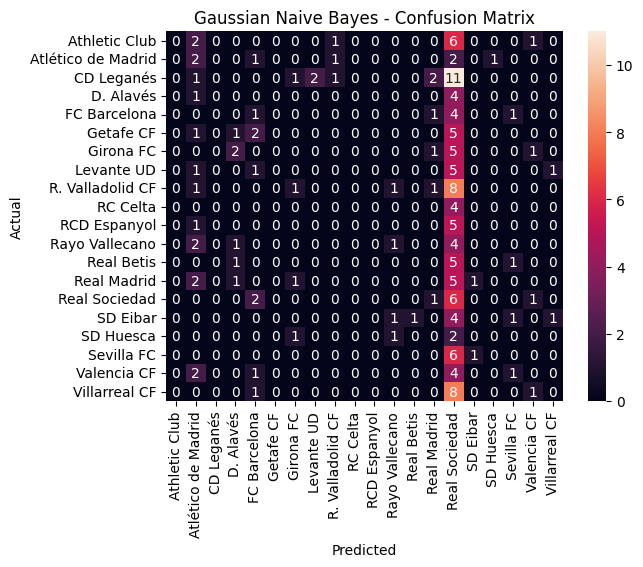

In [17]:
# Train GaussianNB
nb = GaussianNB()
nb.fit(X_train, y_train)

# Predict on the test set
y_pred_nb = nb.predict(X_test)

# Evaluate the model
print("Gaussian Naive Bayes Classification Report:")
print(classification_report(y_test, y_pred_nb, target_names=le.classes_))

# Confusion Matrix
conf_matrix_nb = confusion_matrix(y_test, y_pred_nb)
sns.heatmap(conf_matrix_nb, annot=True, fmt='d', xticklabels=le.classes_, yticklabels=le.classes_)
plt.title("Gaussian Naive Bayes - Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


k-Nearest Neighbors (kNN) Classification Report:
                    precision    recall  f1-score   support

     Athletic Club       0.05      0.20      0.08        10
Atlético de Madrid       0.00      0.00      0.00         7
        CD Leganés       0.12      0.11      0.11        18
         D. Alavés       0.06      0.20      0.10         5
      FC Barcelona       0.10      0.14      0.12         7
         Getafe CF       0.11      0.11      0.11         9
         Girona FC       0.00      0.00      0.00         9
        Levante UD       0.00      0.00      0.00         8
  R. Valladolid CF       0.00      0.00      0.00        12
          RC Celta       0.00      0.00      0.00         4
      RCD Espanyol       0.00      0.00      0.00         6
    Rayo Vallecano       0.00      0.00      0.00         8
        Real Betis       0.00      0.00      0.00         7
       Real Madrid       0.00      0.00      0.00        10
     Real Sociedad       0.00      0.00      0.00 

/Users/billbao/Dropbox/Mac/Documents/2024 Fall/322/finalProject/CPSC322-FinalProject/.venv/lib/python3.13/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/billbao/Dropbox/Mac/Documents/2024 Fall/322/finalProject/CPSC322-FinalProject/.venv/lib/python3.13/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/billbao/Dropbox/Mac/Documents/2024 Fall/322/finalProject/CPSC322-FinalProject/.venv/lib/python3.13/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defi

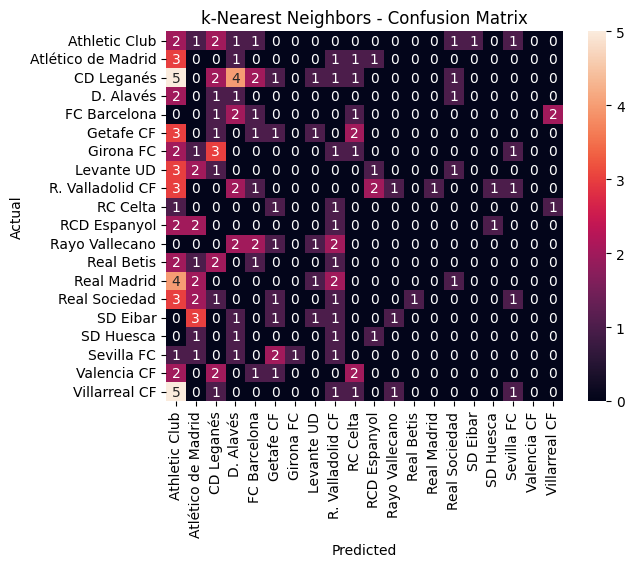

In [18]:
# Train kNN
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train_scaled, y_train)

# Predict on the test set
y_pred_knn = knn.predict(X_test_scaled)

# Evaluate the model
print("k-Nearest Neighbors (kNN) Classification Report:")
print(classification_report(y_test, y_pred_knn, target_names=le.classes_))

# Confusion Matrix
conf_matrix_knn = confusion_matrix(y_test, y_pred_knn)
sns.heatmap(conf_matrix_knn, annot=True, fmt='d', xticklabels=le.classes_, yticklabels=le.classes_)
plt.title("k-Nearest Neighbors - Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


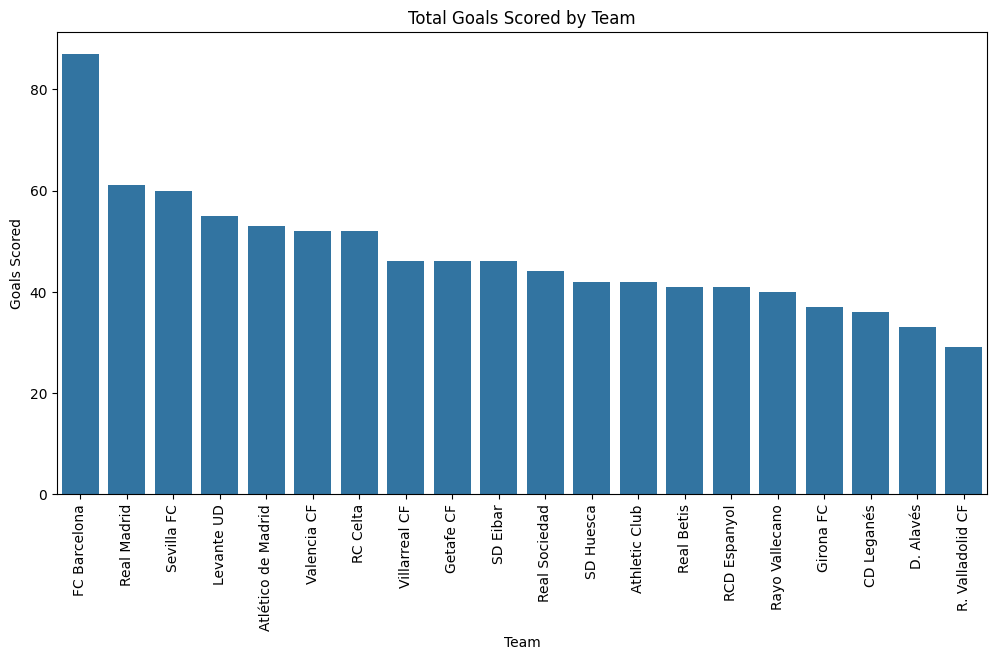

ValueError: could not convert string to float: 'Athletic Club'

<Figure size 800x600 with 0 Axes>

In [19]:
# Visualize the distribution of goals scored by teams
team_goals = data.groupby('Team')['Goals scored'].sum().sort_values(ascending=False)
plt.figure(figsize=(12, 6))
sns.barplot(x=team_goals.index, y=team_goals.values)
plt.title("Total Goals Scored by Team")
plt.xticks(rotation=90)
plt.xlabel("Team")
plt.ylabel("Goals Scored")
plt.show()

# Correlation heatmap for feature selection
plt.figure(figsize=(8, 6))
sns.heatmap(data[features + [target]].corr(), annot=True, cmap="coolwarm")
plt.title("Correlation Matrix")
plt.show()


Random Forest Classification Report:
                    precision    recall  f1-score   support

     Athletic Club       0.00      0.00      0.00        10
Atlético de Madrid       0.12      0.14      0.13         7
        CD Leganés       0.00      0.00      0.00        18
         D. Alavés       0.00      0.00      0.00         5
      FC Barcelona       0.00      0.00      0.00         7
         Getafe CF       0.00      0.00      0.00         9
         Girona FC       0.00      0.00      0.00         9
        Levante UD       0.00      0.00      0.00         8
  R. Valladolid CF       0.00      0.00      0.00        12
          RC Celta       0.00      0.00      0.00         4
      RCD Espanyol       0.00      0.00      0.00         6
    Rayo Vallecano       0.00      0.00      0.00         8
        Real Betis       0.04      0.14      0.06         7
       Real Madrid       0.00      0.00      0.00        10
     Real Sociedad       0.00      0.00      0.00        10
  

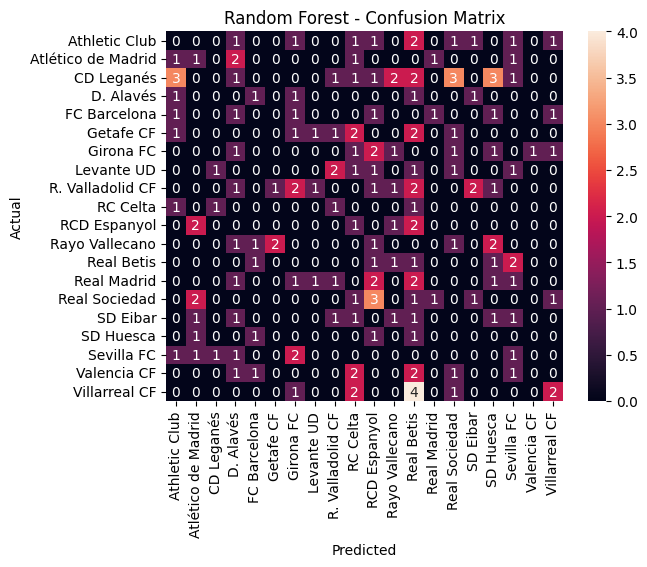

In [20]:
from sklearn.ensemble import RandomForestClassifier

# Train Random Forest
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

# Predict on the test set
y_pred_rf = rf.predict(X_test)

# Evaluate the model
print("Random Forest Classification Report:")
print(classification_report(y_test, y_pred_rf, target_names=le.classes_))

# Confusion Matrix
conf_matrix_rf = confusion_matrix(y_test, y_pred_rf)
sns.heatmap(conf_matrix_rf, annot=True, fmt='d', xticklabels=le.classes_, yticklabels=le.classes_)
plt.title("Random Forest - Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


In [ ]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.cluster import KMeans
from sklearn.metrics import classification_report, confusion_matrix

# Load the dataset
file_path = 'laliga_player_stats_english.csv'
data = pd.read_csv(file_path)

# Display basic info
data.head()
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 556 entries, 0 to 555
Data columns (total 62 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   Team                                   556 non-null    object 
 1   Position                               556 non-null    object 
 2   Shirt number                           526 non-null    float64
 3   Name                                   556 non-null    object 
 4   Minutes played                         556 non-null    float64
 5   Games played                           556 non-null    int64  
 6   Percentage of games played             556 non-null    object 
 7   Full games played                      556 non-null    int64  
 8   Percentage of full games played        556 non-null    object 
 9   Games started                          556 non-null    int64  
 10  Percentage of games started            556 non-null    object 
 11  Games 

## Analsis

In [24]:
# Import necessary libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
file_path = 'league_standings_19_20.csv'
data = pd.read_csv(file_path)

# Display the dataset
print(data.head())


   Pos             Team  Pld   W   D   L  GF  GA  GD  Pts
0    1  Real Madrid (C)   38  26   9   3  70  25  45   87
1    2        Barcelona   38  25   7   6  86  38  48   82
2    3  Atlético Madrid   38  18  16   4  51  27  24   70
3    4          Sevilla   38  19  13   6  54  34  20   70
4    5       Villarreal   38  18   6  14  63  49  14   60


In [25]:
# Select features and target
features = ['W', 'D', 'L', 'GF', 'GA', 'GD', 'Pts']  # Features to predict league positions
target = 'Pos'

X = data[features]
y = data[target]

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


k-Nearest Neighbors (kNN) Classification Report:
              precision    recall  f1-score   support

           1       0.00      0.00      0.00       1.0
           2       0.00      0.00      0.00       1.0
           3       0.00      0.00      0.00       0.0
           5       0.00      0.00      0.00       0.0
           6       0.00      0.00      0.00       1.0
           7       0.00      0.00      0.00       0.0
           9       0.00      0.00      0.00       1.0
          12       0.00      0.00      0.00       0.0
          13       0.00      0.00      0.00       0.0
          16       0.00      0.00      0.00       1.0
          18       0.00      0.00      0.00       1.0

    accuracy                           0.00       6.0
   macro avg       0.00      0.00      0.00       6.0
weighted avg       0.00      0.00      0.00       6.0



/Users/billbao/Dropbox/Mac/Documents/2024 Fall/322/finalProject/CPSC322-FinalProject/.venv/lib/python3.13/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/billbao/Dropbox/Mac/Documents/2024 Fall/322/finalProject/CPSC322-FinalProject/.venv/lib/python3.13/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/billbao/Dropbox/Mac/Documents/2024 Fall/322/finalProject/CPSC322-FinalProject/.venv/lib/python3.13/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and 

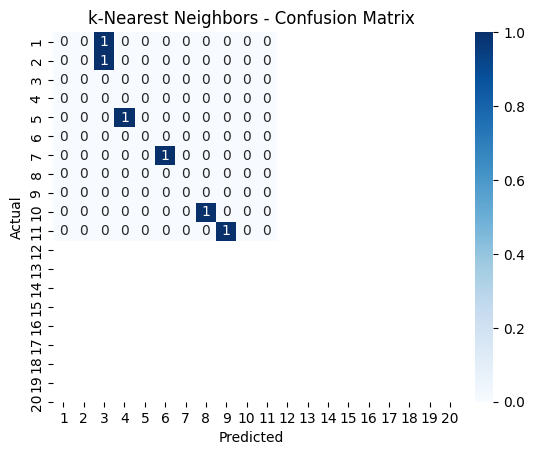

In [26]:
# Train kNN Classifier
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train_scaled, y_train)

# Predict on the test set
y_pred_knn = knn.predict(X_test_scaled)

# Evaluate the model
print("k-Nearest Neighbors (kNN) Classification Report:")
print(classification_report(y_test, y_pred_knn))

# Confusion Matrix
conf_matrix_knn = confusion_matrix(y_test, y_pred_knn)
sns.heatmap(conf_matrix_knn, annot=True, fmt='d', cmap='Blues', xticklabels=y.unique(), yticklabels=y.unique())
plt.title("k-Nearest Neighbors - Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


Gaussian Naive Bayes Classification Report:
              precision    recall  f1-score   support

           1       0.00      0.00      0.00       1.0
           2       0.00      0.00      0.00       1.0
           3       0.00      0.00      0.00       0.0
           4       0.00      0.00      0.00       0.0
           6       0.00      0.00      0.00       1.0
           7       0.00      0.00      0.00       0.0
           9       0.00      0.00      0.00       1.0
          10       0.00      0.00      0.00       0.0
          14       0.00      0.00      0.00       0.0
          16       0.00      0.00      0.00       1.0
          17       0.00      0.00      0.00       0.0
          18       0.00      0.00      0.00       1.0

    accuracy                           0.00       6.0
   macro avg       0.00      0.00      0.00       6.0
weighted avg       0.00      0.00      0.00       6.0



/Users/billbao/Dropbox/Mac/Documents/2024 Fall/322/finalProject/CPSC322-FinalProject/.venv/lib/python3.13/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/billbao/Dropbox/Mac/Documents/2024 Fall/322/finalProject/CPSC322-FinalProject/.venv/lib/python3.13/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/billbao/Dropbox/Mac/Documents/2024 Fall/322/finalProject/CPSC322-FinalProject/.venv/lib/python3.13/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and 

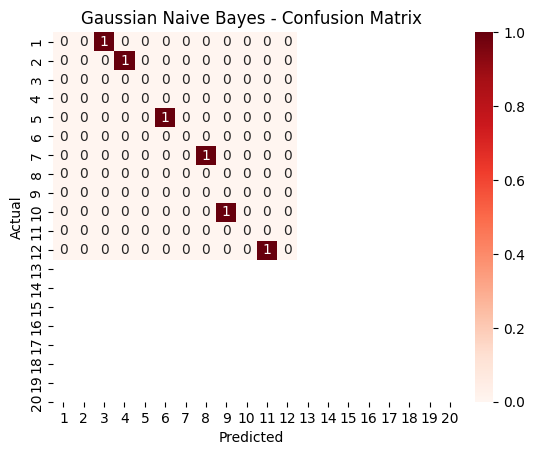

In [27]:
# Train Gaussian Naive Bayes Classifier
nb = GaussianNB()
nb.fit(X_train, y_train)

# Predict on the test set
y_pred_nb = nb.predict(X_test)

# Evaluate the model
print("Gaussian Naive Bayes Classification Report:")
print(classification_report(y_test, y_pred_nb))

# Confusion Matrix
conf_matrix_nb = confusion_matrix(y_test, y_pred_nb)
sns.heatmap(conf_matrix_nb, annot=True, fmt='d', cmap='Reds', xticklabels=y.unique(), yticklabels=y.unique())
plt.title("Gaussian Naive Bayes - Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()
